# Time Series Exercise - 

### Follow along with the instructions in bold. Watch the solutions video if you get stuck!

## The Data

** Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line **

**Monthly milk production: pounds per cow. Jan 62 - Dec 75**

** Import numpy pandas and matplotlib **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** Use pandas to read the csv of the monthly-milk-production.csv file and set index_col='Month' **

In [2]:
milk = pd.read_csv('./monthly-milk-production.csv', index_col='Month')

** Check out the head of the dataframe**

In [3]:
milk.head()

Milk Production
Month                               
1962-01-01 01:00:00            589.0
1962-02-01 01:00:00            561.0
1962-03-01 01:00:00            640.0
1962-04-01 01:00:00            656.0
1962-05-01 01:00:00            727.0

** Make the index a time series by using: **

    milk.index = pd.to_datetime(milk.index)

In [4]:
milk.index = pd.to_datetime(milk.index)

In [5]:
milk.index

DatetimeIndex(['1962-01-01 01:00:00', '1962-02-01 01:00:00',
               '1962-03-01 01:00:00', '1962-04-01 01:00:00',
               '1962-05-01 01:00:00', '1962-06-01 01:00:00',
               '1962-07-01 01:00:00', '1962-08-01 01:00:00',
               '1962-09-01 01:00:00', '1962-10-01 01:00:00',
               ...
               '1975-03-01 01:00:00', '1975-04-01 01:00:00',
               '1975-05-01 01:00:00', '1975-06-01 01:00:00',
               '1975-07-01 01:00:00', '1975-08-01 01:00:00',
               '1975-09-01 01:00:00', '1975-10-01 01:00:00',
               '1975-11-01 01:00:00', '1975-12-01 01:00:00'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [6]:
milk.columns

Index(['Milk Production'], dtype='object')

** Plot out the time series data. **

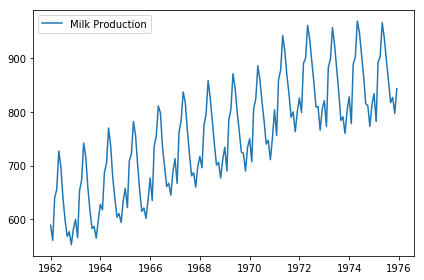

In [80]:
plt.plot(milk.index, milk, label='Milk Production')
plt.legend()
plt.tight_layout()

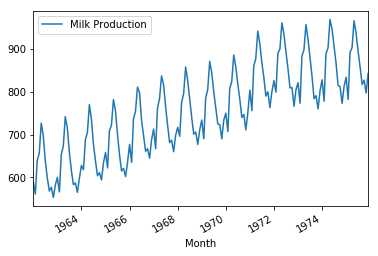

In [81]:
milk.plot()

___

### Train Test Split

** Let's attempt to predict a year's worth of data. (12 months or 12 steps into the future) **

** Create a test train split using indexing (hint: use .head() or tail() or .iloc[]). We don't want a random train test split, we want to specify that the test set is the last 12 months of data is the test set, with everything before it is the training. **

In [8]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [9]:
milk_train = milk[:-12]

In [10]:
milk_test = milk[-12:]

In [11]:
milk_train.tail(12)

Milk Production
Month                               
1974-01-01 01:00:00            828.0
1974-02-01 01:00:00            778.0
1974-03-01 01:00:00            889.0
1974-04-01 01:00:00            902.0
1974-05-01 01:00:00            969.0
1974-06-01 01:00:00            947.0
1974-07-01 01:00:00            908.0
1974-08-01 01:00:00            867.0
1974-09-01 01:00:00            815.0
1974-10-01 01:00:00            812.0
1974-11-01 01:00:00            773.0
1974-12-01 01:00:00            813.0

In [12]:
milk_test.head(12)

Milk Production
Month                               
1975-01-01 01:00:00            834.0
1975-02-01 01:00:00            782.0
1975-03-01 01:00:00            892.0
1975-04-01 01:00:00            903.0
1975-05-01 01:00:00            966.0
1975-06-01 01:00:00            937.0
1975-07-01 01:00:00            896.0
1975-08-01 01:00:00            858.0
1975-09-01 01:00:00            817.0
1975-10-01 01:00:00            827.0
1975-11-01 01:00:00            797.0
1975-12-01 01:00:00            843.0

### Scale the Data

** Use sklearn.preprocessing to scale the data using the MinMaxScaler. Remember to only fit_transform on the training data, then transform the test data. You shouldn't fit on the test data as well, otherwise you are assuming you would know about future behavior!**

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
milk_train = scaler.fit_transform(milk_train)

In [16]:
milk_test = scaler.transform(milk_test)

In [17]:
milk_train[-12:]

array([[ 0.66105769],
       [ 0.54086538],
       [ 0.80769231],
       [ 0.83894231],
       [ 1.        ],
       [ 0.94711538],
       [ 0.85336538],
       [ 0.75480769],
       [ 0.62980769],
       [ 0.62259615],
       [ 0.52884615],
       [ 0.625     ]])

In [18]:
milk_test

array([[ 0.67548077],
       [ 0.55048077],
       [ 0.81490385],
       [ 0.84134615],
       [ 0.99278846],
       [ 0.92307692],
       [ 0.82451923],
       [ 0.73317308],
       [ 0.63461538],
       [ 0.65865385],
       [ 0.58653846],
       [ 0.69711538]])

## Batch Function

** We'll need a function that can feed batches of the training data. We'll need to do several things that are listed out as steps in the comments of the function. Remember to reference the previous batch method from the lecture for hints. Try to fill out the function template below, this is a pretty hard step, so feel free to reference the solutions! **

In [19]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """

    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps
    start_index = np.random.randint(0, len(training_data) - steps, size=batch_size)
    
    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps + 1. Then reshape this data to be (1,steps+1)
    end_index = start_index + steps + 1
    zip_index = np.array(list(zip(start_index, end_index)))
    batch_data = np.array([ training_data[z[0]:z[1]] for z in zip_index ])
    
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN to .reshape(-1,steps,1)
    return \
        batch_data[:, :-1].reshape(-1, steps, 1), \
        batch_data[:, 1:].reshape(-1, steps, 1)

In [20]:
next_batch(milk_train, 5, 12)[0].shape

(5, 12, 1)

## Setting Up The RNN Model

** Import TensorFlow **

In [21]:
import tensorflow as tf

### The Constants

** Define the constants in a single cell. You'll need the following (in parenthesis are the values I used in my solution, but you can play with some of these): **
* Number of Inputs (1)
* Number of Time Steps (12)
* Number of Neurons per Layer (100)
* Number of Outputs (1)
* Learning Rate (0.03)
* Number of Iterations for Training (4000)
* Batch Size (1)

In [22]:
num_inputs = 1
num_time_steps = 12
num_neurons = 100
num_outputs = 1
learning_rate = 0.03
training_iter = 4000
batch_size = 1

We need to reset the graph so we do not get the error: 
```
ValueError: Variable rnn/output_projection_wrapper/kernel already exists, disallowed. Did you mean to set reuse=True in VarScope?
```
https://stackoverflow.com/questions/47296969/valueerror-variable-rnn-basic-rnn-cell-kernel-already-exists-disallowed-did-y

In [58]:
tf.reset_default_graph()

** Create Placeholders for X and y. (You can change the variable names if you want). The shape for these placeholders should be [None,num_time_steps-1,num_inputs] and [None, num_time_steps-1, num_outputs] The reason we use num_time_steps-1 is because each of these will be one step shorter than the original time steps size, because we are training the RNN network to predict one point into the future based on the input sequence.**  

In [59]:
X = tf.placeholder(tf.float32, shape=[None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, shape=[None, num_time_steps, num_outputs])

** Now create the RNN Layer, you have complete freedom over this, use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers, BasicRNNCells, BasicLSTMCells, MultiRNNCell, GRUCell etc... Keep in mind not every combination will work well! (If in doubt, the solutions used an Outputprojection Wrapper around a basic LSTM cell with relu activation.**

In [60]:
basic_cell = tf.contrib.rnn.GRUCell(num_units = num_neurons, activation = tf.nn.relu)
rnn_cell = tf.contrib.rnn.OutputProjectionWrapper(cell = basic_cell, output_size = num_outputs)

** Now pass in the cells variable into tf.nn.dynamic_rnn, along with your first placeholder (X)**

In [61]:
outputs, states = tf.nn.dynamic_rnn(rnn_cell, X, dtype = tf.float32)

### Loss Function and Optimizer

** Create a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer, remember to pass in your learning rate. **

In [62]:
mse = tf.reduce_mean(tf.square(outputs - y))

In [63]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

In [64]:
train = optimizer.minimize(mse)

** Initialize the global variables **

In [65]:
init = tf.global_variables_initializer()

** Create an instance of tf.train.Saver() **

In [66]:
saver = tf.train.Saver()

### Session

** Run a tf.Session that trains on the batches created by your next_batch function. Also add an a loss evaluation for every 100 training iterations. Remember to save your model after you are done training. **

In [67]:
with tf.Session() as sess:
    sess.run(init)
    
    for it in range(training_iter):
        train_x, train_y = next_batch(milk_train, batch_size, num_time_steps)
        sess.run(train, feed_dict = { X: train_x, y: train_y })
        
        if it % 100 == 0:
            error = sess.run(mse, feed_dict = { X: train_x, y: train_y })
            print(str(it) + "\tMSE: " + str(error))
        
    # Save Model for Later
    saver.save(sess, "./davizuku_gru_ts_model")

0	MSE: 0.0570377
100	MSE: 0.00945346
200	MSE: 0.00956752
300	MSE: 0.00890658
400	MSE: 0.00995793
500	MSE: 0.00516422
600	MSE: 0.013988
700	MSE: 0.0167363
800	MSE: 0.0131875
900	MSE: 0.0054319
1000	MSE: 0.00482952
1100	MSE: 0.00922388
1200	MSE: 0.00665012
1300	MSE: 0.00539537
1400	MSE: 0.002787
1500	MSE: 0.00406432
1600	MSE: 0.00261512
1700	MSE: 0.00824748
1800	MSE: 0.00977889
1900	MSE: 0.00441789
2000	MSE: 0.00674078
2100	MSE: 0.001715
2200	MSE: 0.00471079
2300	MSE: 0.00663145
2400	MSE: 0.00894946
2500	MSE: 0.00351366
2600	MSE: 0.00698641
2700	MSE: 0.00265307
2800	MSE: 0.00382345
2900	MSE: 0.00165975
3000	MSE: 0.00178675
3100	MSE: 0.0069998
3200	MSE: 0.00158873
3300	MSE: 0.00740608
3400	MSE: 0.00602282
3500	MSE: 0.00466678
3600	MSE: 0.00208873
3700	MSE: 0.00222227
3800	MSE: 0.000979142
3900	MSE: 0.00105052


______

## Predicting Future (Test Data)

** Show the test_set (the last 12 months of your original complete data set) **

In [33]:
milk_test

array([[ 0.67548077],
       [ 0.55048077],
       [ 0.81490385],
       [ 0.84134615],
       [ 0.99278846],
       [ 0.92307692],
       [ 0.82451923],
       [ 0.73317308],
       [ 0.63461538],
       [ 0.65865385],
       [ 0.58653846],
       [ 0.69711538]])

** Now we want to attempt to predict these 12 months of data, using only the training data we had. To do this we will feed in a seed training_instance of the last 12 months of the training_set of data to predict 12 months into the future. Then we will be able to compare our generated 12 months to our actual true historical values from the test set! **

# Generative Session
### NOTE: Recall that our model is really only trained to predict 1 time step ahead, asking it to generate 12 steps is a big ask, and technically not what it was trained to do! Think of this more as generating new values based off some previous pattern, rather than trying to directly predict the future. You would need to go back to the original model and train the model to predict 12 time steps ahead to really get a higher accuracy on the test data. (Which has its limits due to the smaller size of our data set)
** Fill out the session code below to generate 12 months of data based off the last 12 months of data from the training set. The hardest part about this is adjusting the arrays with their shapes and sizes. Reference the lecture for hints.**

In [72]:
pred_length = 12

In [79]:
predictions = {}
models = {
    'LSTM': "./davizuku_lstm_ts_model",
    'Basic': "./davizuku_basic_ts_model",
    'GRU': "./davizuku_gru_ts_model",
}

for modelName, modelFile in models.items():
    predictions[modelName] = []
    with tf.Session() as sess:
        saver.restore(sess, modelFile)
        batch_x = milk_train[-num_time_steps:]
        for it in range(pred_length):
            preds = sess.run(outputs, feed_dict = { X: batch_x[-num_time_steps:].reshape(1, num_time_steps, 1) })
            predictions[modelName].append(preds[0, -1, 0])
            batch_x = np.append(batch_x, preds[0, -1, 0])


INFO:tensorflow:Restoring parameters from ./davizuku_basic_ts_model


NotFoundError: Key rnn/output_projection_wrapper/gru_cell/candidate/bias not found in checkpoint
	 [[Node: save/RestoreV2_5 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_5/tensor_names, save/RestoreV2_5/shape_and_slices)]]

Caused by op 'save/RestoreV2_5', defined at:
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-66-18da33d742f9>", line 1, in <module>
    saver = tf.train.Saver()
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1140, in __init__
    self.build()
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1172, in build
    filename=self._filename)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 688, in build
    restore_sequentially, reshape)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 663, in restore_v2
    dtypes=dtypes, name=name)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key rnn/output_projection_wrapper/gru_cell/candidate/bias not found in checkpoint
	 [[Node: save/RestoreV2_5 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_5/tensor_names, save/RestoreV2_5/shape_and_slices)]]


** Show the result of the predictions. **

In [74]:
predictions

{}

** Grab the portion of the results that are the generated values and apply inverse_transform on them to turn them back into milk production value units (lbs per cow). Also reshape the results to be (12,1) so we can easily add them to the test_set dataframe.**

In [43]:
milk_pred = scaler.inverse_transform(np.array(predictions).reshape(12, 1))
milk_pred

array([[ 813.47753906],
       [ 795.4017334 ],
       [ 896.69073486],
       [ 865.65161133],
       [ 954.81384277],
       [ 899.27008057],
       [ 892.67297363],
       [ 857.02386475],
       [ 798.79425049],
       [ 820.4463501 ],
       [ 758.86541748],
       [ 796.05230713]], dtype=float32)

** Create a new column on the test_set called "Generated" and set it equal to the generated results. You may get a warning about this, feel free to ignore it.**

In [44]:
milk_test_raw = milk[-12:]
milk_test_raw['Generated'] = milk_pred

//anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


** View the test_set dataframe. **

In [45]:
milk_test_raw

Milk Production   Generated
Month                                           
1975-01-01 01:00:00            834.0  813.477539
1975-02-01 01:00:00            782.0  795.401733
1975-03-01 01:00:00            892.0  896.690735
1975-04-01 01:00:00            903.0  865.651611
1975-05-01 01:00:00            966.0  954.813843
1975-06-01 01:00:00            937.0  899.270081
1975-07-01 01:00:00            896.0  892.672974
1975-08-01 01:00:00            858.0  857.023865
1975-09-01 01:00:00            817.0  798.794250
1975-10-01 01:00:00            827.0  820.446350
1975-11-01 01:00:00            797.0  758.865417
1975-12-01 01:00:00            843.0  796.052307

** Plot out the two columns for comparison. **

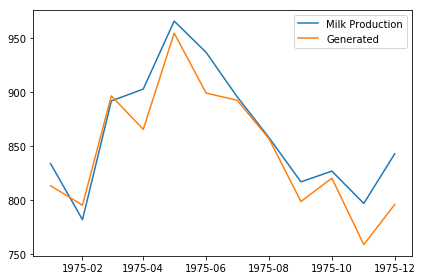

In [46]:
plt.plot(milk_test_raw)
plt.legend(['Milk Production', 'Generated'])
plt.tight_layout()

# Great Job!

Play around with the parameters and RNN layers, does a faster learning rate with more steps improve the model? What about GRU or BasicRNN units? What if you train the original model to not just predict one timestep ahead into the future, but 3 instead? Lots of stuff to add on here!